---
title: python function of the day
author: kyle wodehouse
date: today
format:
    html:
        self-contained: true
        theme: pulse
toc: true
number-sections: true
---

everyone loves the reoccurring matlab function of the day segment of CHEG304. sadly, matlab is paid, ancient, and a massive pain to get your company to give you a license for when you're in industry. i humbly present all the matlab function of the days as **python** function of the days.

# random sampling

## randn

the first ever matlab function of the day was on week 1 wednesday and it was matlab's `randn`, a function that takes in an array size and returns an array of that size filled with normally distributed random numbers. the python version is `numpy.random.randn` see the documentation [here](https://numpy.org/doc/2.2/reference/random/generated/numpy.random.randn.html), but here are some simple examples

### generating 5 random numbers

In [445]:
import numpy as np
np.random.randn(5)

array([ 0.70775804,  0.95854058, -0.85273114,  1.08647208,  0.80996223])

### generating 3x3 array of random numbers

In [446]:
np.random.randn(3,3)

array([[-0.91460082,  0.41348596, -2.33369203],
       [-1.43679709,  0.07024915, -1.74213467],
       [ 0.90607798, -1.0018556 ,  1.23715038]])

## rand

the second ever matlab function of the day was `rand`, which takes in array dimensions and returns an array of that size with samples from the uniform distribution between 0 and 1. the python version of this is `numpy.random.rand` which is functionally the same. see [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)

### generating 3 random numbers

In [447]:
np.random.rand(3)

array([0.5483105 , 0.48830619, 0.24472889])

### generating 5x3 array of random numbers

In [448]:
np.random.rand(5,3)

array([[0.92353201, 0.863304  , 0.46793319],
       [0.44509029, 0.16569169, 0.47712174],
       [0.3267074 , 0.21792045, 0.23034987],
       [0.86958029, 0.72083987, 0.15936911],
       [0.96312729, 0.09769867, 0.15152276]])

## randi

on week 3 friday the matlab function of the day was `randi`, which generates a random integer between 1 and the first parameter `imax`. the closest python function to this is `numpy.random.randint` which takes in a low, high, and array size (as a tuple!!!!) instead of just taking `imax`. see [documentation](https://numpy.org/doc/2.2/reference/random/generated/numpy.random.randint.html) 

::: {.callout-note}
The interval for the pseudorandom integers is $[\mathrm{low}, \mathrm{high})$
:::

### generating 3 pseudorandom integers between 0 and 100

really [0,100)

In [449]:
np.random.randint(0,100,3)

array([ 5,  1, 45])

### generating a 3x3 array of pseudorandom integers between 5 and 10

more specifically [5,10)

In [450]:
np.random.randint(5,10,(3,3))

array([[6, 7, 9],
       [6, 6, 6],
       [5, 6, 6]])

# discrete distributions

## binopdf

on week 4 friday, `binopdf` was introduced (*during everyone's favorite reoccuring segment*). this is the first funciton where we will start using scipy functions, specifically `scipy.stats.binom.pmf`. see [scipy stats documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) for more distributions and info

::: {.callout-note}
since the binomial distribution is discrete, the method called here is `pmf` (probability mass function). scipy is set up in a delicious fashion so the discrete distributions have `pmf` and the continuous have `pdf` (probability distribution function). 
:::

### probability of getting exactly 3 successes out of 3 trials with 50% success

In [451]:
from scipy.stats import binom
binom.pmf(3, 3, 0.5)

0.125

### probability of getting 30 successes out of 300 trials with 10% success

In [452]:
binom.pmf(30, 300, 0.10)

0.0765611504406652

## other discrete distributions

a good reference here is the [scipy stats documentation](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats). it acknowledges its limitations, but it has everything needed in cheg304 and more

| Distribution    | Scipy        |
|----------------|--------------|
| bernoulli      | `bernoulli`    |
| binomial       | `binom`        |
| geometric      | `geom`         |
| hypergeometric | `hypergeom`    |
| negative binomial | `nbinom`    |
| poisson        | `poisson`      |
| uniform        | `randint`      |



### probability of getting out of jail in monopoly

question 2 from spring 2025 cheg304 exam 1. we can do this with the negative binomial or geometric distribution.

::: {.callout-warning}
scipy swaps the parameters of the negative binomial! for scipy, $k$ is the number of failures and $n$ is the number of successes.

- $n$ is the number of sucesses
- $k$ is the number of failures

here's the pmf that scipy is actually evaluating

$$
f(k) = {k+n-1 \choose n-1} p^n (1-p)^k
$$

this is the same as in table 8.6, but using $k$ instead of $x$ and  $n$ instead of $k$
:::

for this, $p = \frac{1}{6}, k=(0,1,2), n=1$ (in scipy's notation)

In [453]:
from scipy.stats import nbinom
nbinom.pmf(k=[0,1,2], n=1, p=1/6).sum()

0.4212962962962961

can also use the geometric! this is scipy's geometric pmf

$$
f(k) = (1-p)^{k-1}p
$$

In [454]:
from scipy.stats import geom
geom.pmf(k=[1,2,3], p=1/6).sum()

0.42129629629629634

# descriptive stats

on week 5 wednesday the matlab function of the day became like 1 grillion functions of the day. [here](https://numpy.org/doc/stable/reference/routines.statistics.html) is the numpy statistics documentation. nearly all of these are found here

## sum

the python version of `sum` is `numpy.sum` (very surprising). this works with lists or series or arrays. 

In [455]:
np.sum([3,4,5])

12

## mean

the python version of `mean` is `numpy.mean`

In [456]:
np.mean([3,8,12,19])

10.5

## median

for median use `numpy.median`

In [457]:
np.median([14, 15, 16, 17, 100000])

16.0

## mode

you'd think `numpy.mode`, but actually this just does not exist. we need to use `scipy.stats.mode`

In [458]:
from scipy.stats import mode
mode([3,4,4,4,4,100000])

ModeResult(mode=4, count=4)

you can access just the value of the mode (as `int`, instead of the result output) with the `.mode` method

In [459]:
mode([3,4,4,4,4,100000]).mode

4

## std

use `numpy.std` 

::: {.callout-note}
you'll likely want to set `ddof=1` to calculate the sample standard deviation. using $n-1$ instead of $n$ is called [bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).
:::

In [460]:
np.std([3,4,5,5,5,6,6,50], ddof=1)

15.991068935949395

## zscore

which is really a poor name since these are really t-statistics (they're using a sample mean and sample standard deviation!!!!). again we need to fall back onto scipy and use `scipy.stats.zscore`

::: {.callout-note}
you'll likely want to set `ddof=1` here, too.
:::

In [461]:
from scipy.stats import zscore
zscore([3,5,5,6,6,9], ddof=1)

array([-1.35612701, -0.33903175, -0.33903175,  0.16951588,  0.16951588,
        1.69515876])

## min

use `numpy.min`

In [462]:
np.min([3,5,5,5,0,7,2,3,1,100])

0

## max

use `numpy.max`

In [463]:
np.max([3,6,1,4,1e6,1,6])

1000000.0

## range

use `numpy.ptp`. if you're wondering what ptp stands for, it means peak to peak.

[documentation](https://numpy.org/doc/stable/reference/generated/numpy.ptp.html#numpy.ptp)

In [464]:
np.ptp([3,6,100])

97

## quantile

use `numpy.quantile`

[documentation](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html)

### the 95th percentile of 50000 samples from z distribution

In [465]:
vector = np.random.randn(50000)
np.quantile(vector, 0.95)

1.6331956692283367

## skewness, kurtosis

use `scipy.stats.skew` and `scipy.stats.kurtosis` (or don't)

### skew and kurtosis of 5000 samples from z distribution


In [466]:
from scipy.stats import skew
skew(vector)

-0.00790792177058146

In [467]:
from scipy.stats import kurtosis
kurtosis(vector)

-0.013520437832118759

# sampling

on week 6 monday another dump truck of matlab functions was dropped on the slides. all of these will be tackled with scipy in a really beautiful way.

| Distribution | scipy.stats |
|-------------|-------------|
| Normal | `norm` |
| Student's t | `t` |
| Chi-squared | `chi2` |
| F | `f` |

all (continuous) distributions in scipy.stats share the same methods:

- `pdf`: probability density function 
- `cdf`: cumulative distribution function
- `ppf`: percent point function (inverse of cdf)
- `rvs`: random variates (sampling)

## probability density

### probability density at $t=1.2$ for 10 dof

In [468]:
from scipy.stats import t
t.pdf(1.2, 10)

0.1856638936267032

### probability density at $\chi^2=20$ for 20 dof

In [469]:
from scipy.stats import chi2
chi2.pdf(20, 20)

0.06255501786056658

## cumulative density

use the `cdf` method as mentioned earlier

::: {.callout-note}
let $f(x)$ be the probability density function of random variable $x$. for variables that may take on negative values (norm, t), the value of scipy's cdf is

$$
\mathrm{cdf(a)} = \int_{-\infty}^a f(x) dx
$$

for variables that are strictly positive (F, $\chi^2$)

$$
\mathrm{cdf(a)} = \int_{0}^a f(x) dx
$$

this consistency is nice, but it is easy to get confused and use $\chi^2$ wrong since enszer's table is set up the other way 
:::

### cumulative density for $z=1.0$

In [470]:
from scipy.stats import norm
norm.cdf(1)

0.8413447460685429

### cumulative density for $F=1.5$, dfn=10, dfd=8


In [471]:
from scipy.stats import f
f.cdf(1.5, 10, 8)

0.7110457163218693

## inverse functions

as mentioned earlier, the `ppf` method gets the inverse cdf for all of these distributions

### critical t value at $\alpha=0.05$, 1E6 dof

for 2-sided so the result looks familiar

In [472]:
from scipy.stats import t
t.ppf(0.05/2, 1e6)

-1.959966356814107

### critical $\chi^2$ for $\alpha=0.05$, 29 dof

In [473]:
from scipy.stats import chi2
chi2.ppf(0.05, 29)

17.70836618282458

# regression

on week 8 friday the `mldivide` was introduced. sadly, there is not a 1 character solution to $\mathbf{a x = b}$, but there is `numpy.linalg.lstsq`

### first enszer regression example

taken right from week 8 friday slide 18

In [474]:
x = np.ones((7, 2))  # 7x2 array filled w ones
x[:, 1] = np.arange(1, 8)  # second column is 1,2,3,4,5,6,7
y = np.array([0.5, 2.5, 2, 4, 3.5, 6, 5.5]) # from slides

np.linalg.lstsq(x, y, rcond=None)

(array([0.07142857, 0.83928571]),
 array([2.99107143]),
 2,
 array([12.06873433,  1.16002222]))

::: {.callout-note}
this returns more than just the optimal parameters!!!! in order,

1. the least squares solution (what you want)
2. the sum of the squared residuals
3. the rank of $\mathbf{a}$
4. the singular values from the Singular Value Decomposition of $\mathbf{a}$
:::

so really the answers we care about are

In [475]:
np.linalg.lstsq(x, y, rcond=None)[0]

array([0.07142857, 0.83928571])

# anova

## anova1

on week 9 friday, matlab's `anova1` was introduced. one of the python versions of this is `scipy.stats.f_oneway` see the [documentation here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

if the starting data is just a 5x5 array (like the next example) a little bit of wrangling will need to be done. we want an array with the 5 replicates of each treatment, which means we will need separate arrays for each column. this is why you see me take the transpose of the given 5x5 table and assign each of those rows (which were previously columns) to a variable


### one-way anova example problem

as plucked from week 9 wednesday slide 32

In [476]:
from scipy.stats import f_oneway

array = np.array([
    [1.5377, 0.6923, 1.6501, 3.7950, 5.6715],
    [2.8339, 1.5664, 6.0349, 3.8759, 3.7925],
    [-1.2588, 2.3426, 3.7254, 5.4897, 5.7172],
    [1.8622, 5.5784, 2.9369, 5.4090, 6.6302],
    [1.3188, 4.7694, 3.7147, 5.4172, 5.4889]
])

x1, x2, x3, x4, x5 = array.T

f_oneway(x1, x2, x3, x4, x5) # each treatment in separate list!!

F_onewayResult(statistic=6.048813360919241, pvalue=0.002332160487732741)

similar to regression functions, this returns a non-primative type (not a string, int, float, bool). the methods `.statistic` and `.pvalue` will give you access to the F statistic and p-value as float values.

In [477]:
p = f_oneway(x1, x2, x3, x4, x5).pvalue 
p, type(p)

(0.002332160487732741, numpy.float64)

and thats a beautiful float.

## n-way anova

for transitioning to  n-way anova, it will be useful to start using [pingouin](https://pingouin-stats.org/build/html/index.html) and storing our data as DataFrame types ([pandas](https://pandas.pydata.org/). a data frame is synonomous to a table in Excel. columns may be called by a name and there are really convinient helper functions to rearrange your table.

::: {.callout-warning}
anaconda installations do not come with pingouin! install it with the following commands

```
conda activate base
conda install pingouin -c conda-forge
```
:::

### one-way anova example problem with pingouin

I use the `.melt()` method here to turn the table from 5x5 to 25x2 where each row is an individual trial, column 1 is the treatment (the original column), and column 2 is the value.

In [478]:
import pandas as pd
import pingouin 

df = pd.DataFrame(array)
df = df.melt() 
df.anova(dv='value', between='variable')

,Source,ddof1,ddof2,F,p-unc,np2
0,variable,4,20,6.048813,0.002332,0.547463


this way was super super easy (if you are aware of the `.melt()` helper), and it expands really nicely to n-way anova

### 3-way anova example with pingouin

again, the data needs wrangled into an appropriate form where each row is a single trial. for convenience i loaded in the data as a `txt` file. small note: this data is from spring 2029 homework 9 question 1. 

In [479]:
df = pd.read_csv('dat.txt', sep=' ')
df = df.melt(id_vars=['a', 'b', 'c'], 
            value_vars=['rate1', 'rate2'],
            var_name='replicate', 
            value_name='rate').drop(columns=['replicate'])
df.head(3)

,a,b,c,rate
0,-1,-1,-1,0.55
1,1,-1,-1,0.60
2,-1,1,-1,0.37


now it's a similar process to 1 way

- specify the dependent variable, `dv`
- specify the columns for ANOVA, `between`

In [480]:
df.anova(dv='rate', between=['a', 'b', 'c'])

,Source,SS,DF,MS,F,p-unc,np2
0,a,0.008556,1.0,0.008556,1.571757,0.245347,0.164208
1,b,0.158006,1.0,0.158006,29.025258,0.000656,0.783931
2,c,0.001056,1.0,0.001056,0.194030,0.671243,0.023679
3,a * b,0.002256,1.0,0.002256,0.414466,0.537726,0.049256
4,a * c,0.002256,1.0,0.002256,0.414466,0.537726,0.049256
5,b * c,0.000306,1.0,0.000306,0.056257,0.818474,0.006983
6,a * b * c,0.000506,1.0,0.000506,0.092997,0.768185,0.011491
7,Residual,0.043550,8.0,0.005444,NaN,NaN,NaN


### 2-way anova in class example

this is from week 9 friday slide 13.

In [481]:
data = np.array([
    [[86.8, 82.4, 86.7, 83.5], [93.4, 85.2, 94.8, 83.1], [77.9, 89.6, 89.9, 83.7]],
    [[71.9, 72.1, 80.0, 77.4], [74.5, 87.1, 71.9, 84.1], [87.5, 82.7, 78.3, 90.1]],
    [[65.5, 72.4, 76.6, 66.7], [66.7, 77.1, 76.7, 86.1], [72.7, 77.8, 83.5, 78.8]],
    [[63.9, 70.4, 77.2, 81.2], [73.7, 81.6, 84.2, 84.9], [79.8, 75.7, 80.5, 72.9]]
])

catalysts = ['A', 'B', 'C', 'D']
temperatures = ['r1', 'r2', 'r3']
all_data = []

for i, catalyst in enumerate(catalysts):
    for j, temp in enumerate(temperatures):
        for replicate in data[i][j]:
            all_data.append({
                'Catalyst': catalyst,
                'Temperature': temp,
                'Value': replicate
            })

df = pd.DataFrame(all_data)
df.head(3)

,Catalyst,Temperature,Value
0,A,r1,86.8
1,A,r1,82.4
2,A,r1,86.7


yes, this is the same exact way you'd need to manipulate the table to use minitab, too.

In [482]:
df.anova(dv='Value', between=['Catalyst', "Temperature"])

,Source,SS,DF,MS,F,p-unc,np2
0,Catalyst,877.563333,3,292.521111,9.357931,0.000104,0.438148
1,Temperature,327.140417,2,163.570208,5.232712,0.010118,0.225230
2,Catalyst * Temperature,156.982917,6,26.163819,0.836997,0.549603,0.122422
3,Residual,1125.330000,36,31.259167,NaN,NaN,NaN


# machine learning day

on week 13 friday a few matlab functions for common machine learning algorithms were shared. all of these and more are availible in python through [scikit learn](https://scikit-learn.org/stable/). 

## k-means

i'll include a quick k-means clustering example. i'll generate some data that *should* have 3 clusters on an xy plane.

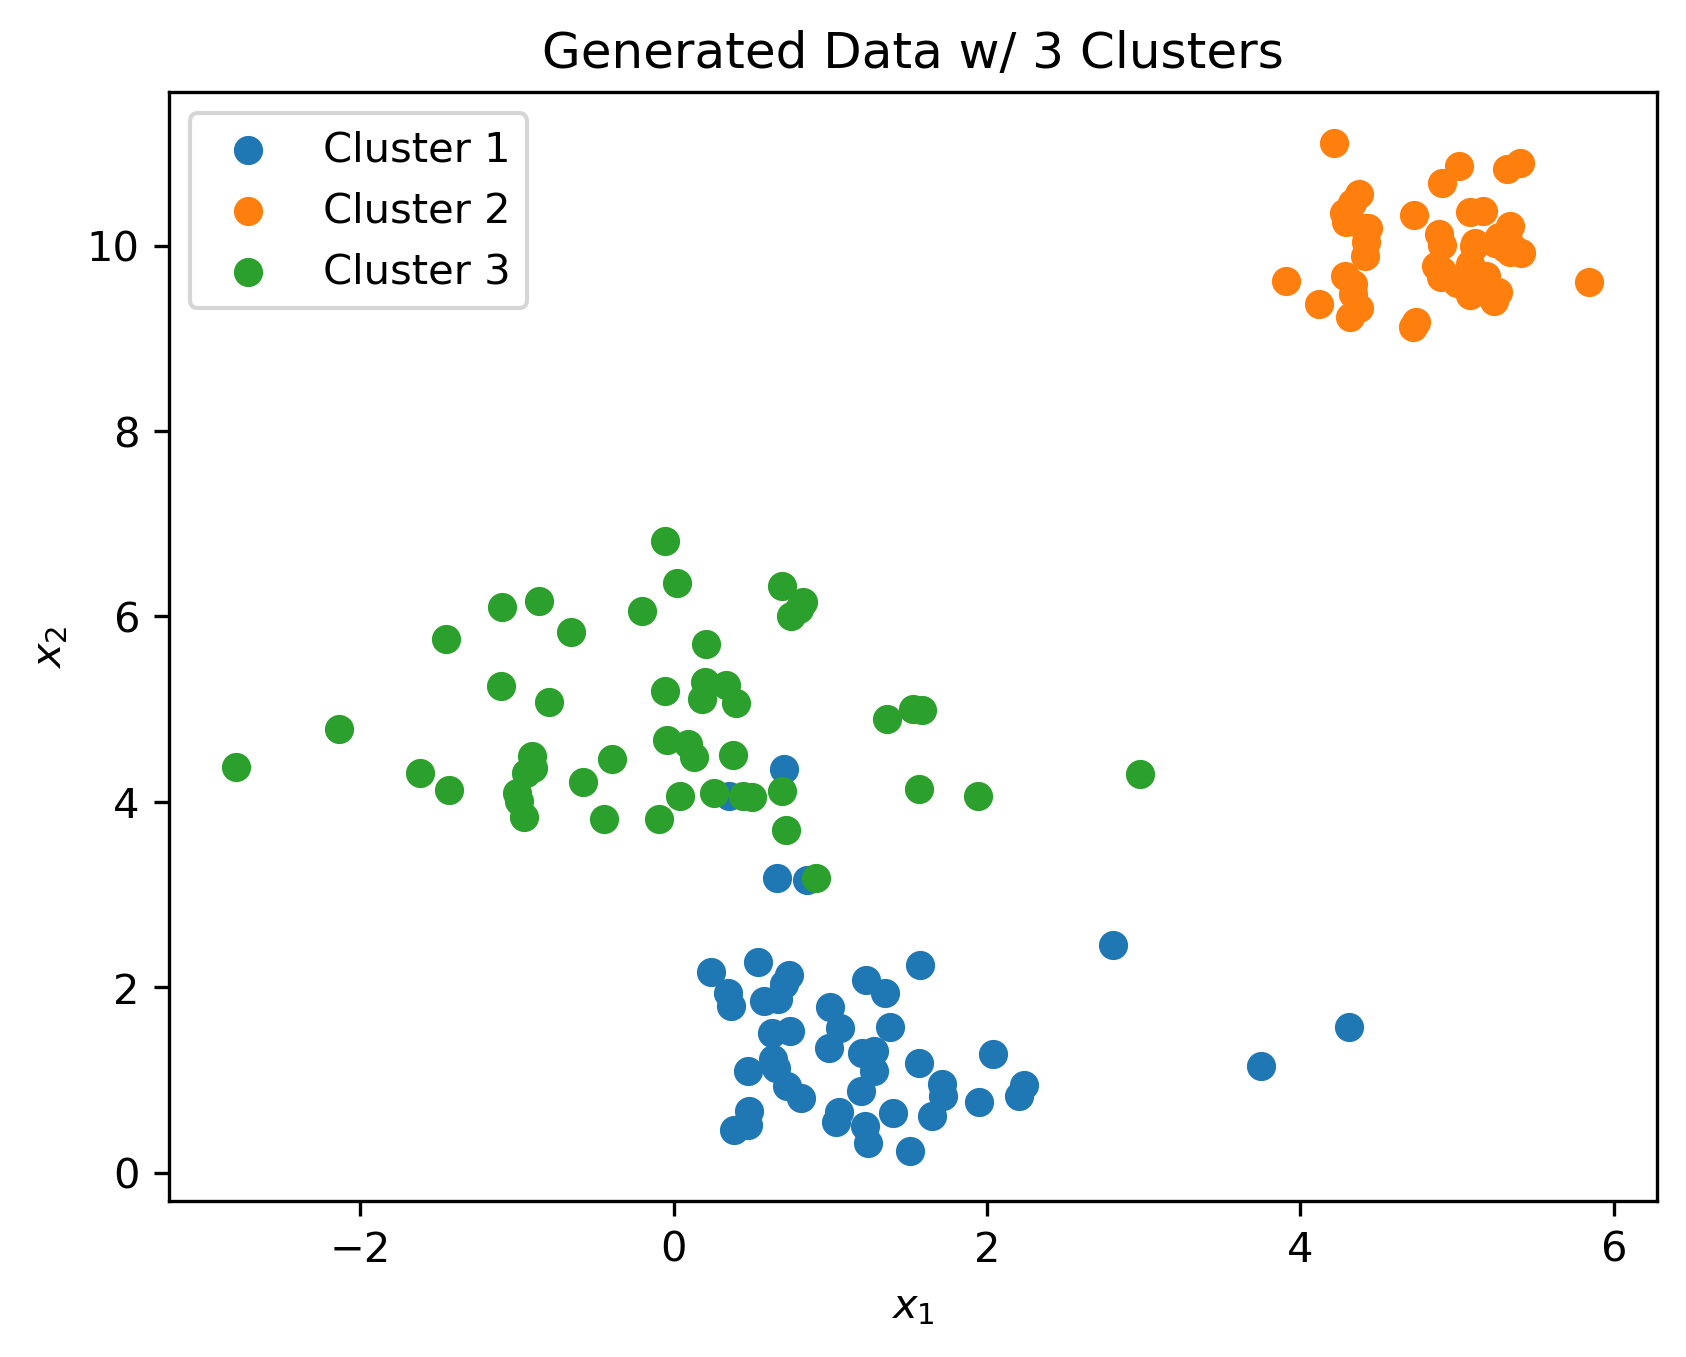

In [483]:
import matplotlib.pyplot as plt

n_points = 50 
cluster1 = 1.8**np.random.randn(n_points, 2) + np.array([0, 0])
cluster2 = 0.5*np.random.randn(n_points, 2) + np.array([5, 10])
cluster3 = np.random.randn(n_points, 2) + np.array([0, 5])
X = np.vstack([cluster1, cluster2, cluster3])

fig, ax = plt.subplots(dpi=300)
ax.scatter(X[:n_points, 0], X[:n_points, 1], label='Cluster 1')
ax.scatter(X[n_points:2*n_points, 0], X[n_points:2*n_points, 1], label='Cluster 2')
ax.scatter(X[2*n_points:, 0], X[2*n_points:, 1], label='Cluster 3')
ax.set(title='Generated Data w/ 3 Clusters', xlabel='$x_1$', ylabel='$x_2$')
plt.legend();

now importing the appropriate k-means function from `sklearn`. you may be thinking *why does this take in a random state* and the answer is that the points where the centroids are initiated are chosen randomly. this random initialization is also why k-means implimentations will usually take in a parameter to say how many random initializations you want to do (since you only ever converge to a local minimum each initialization)

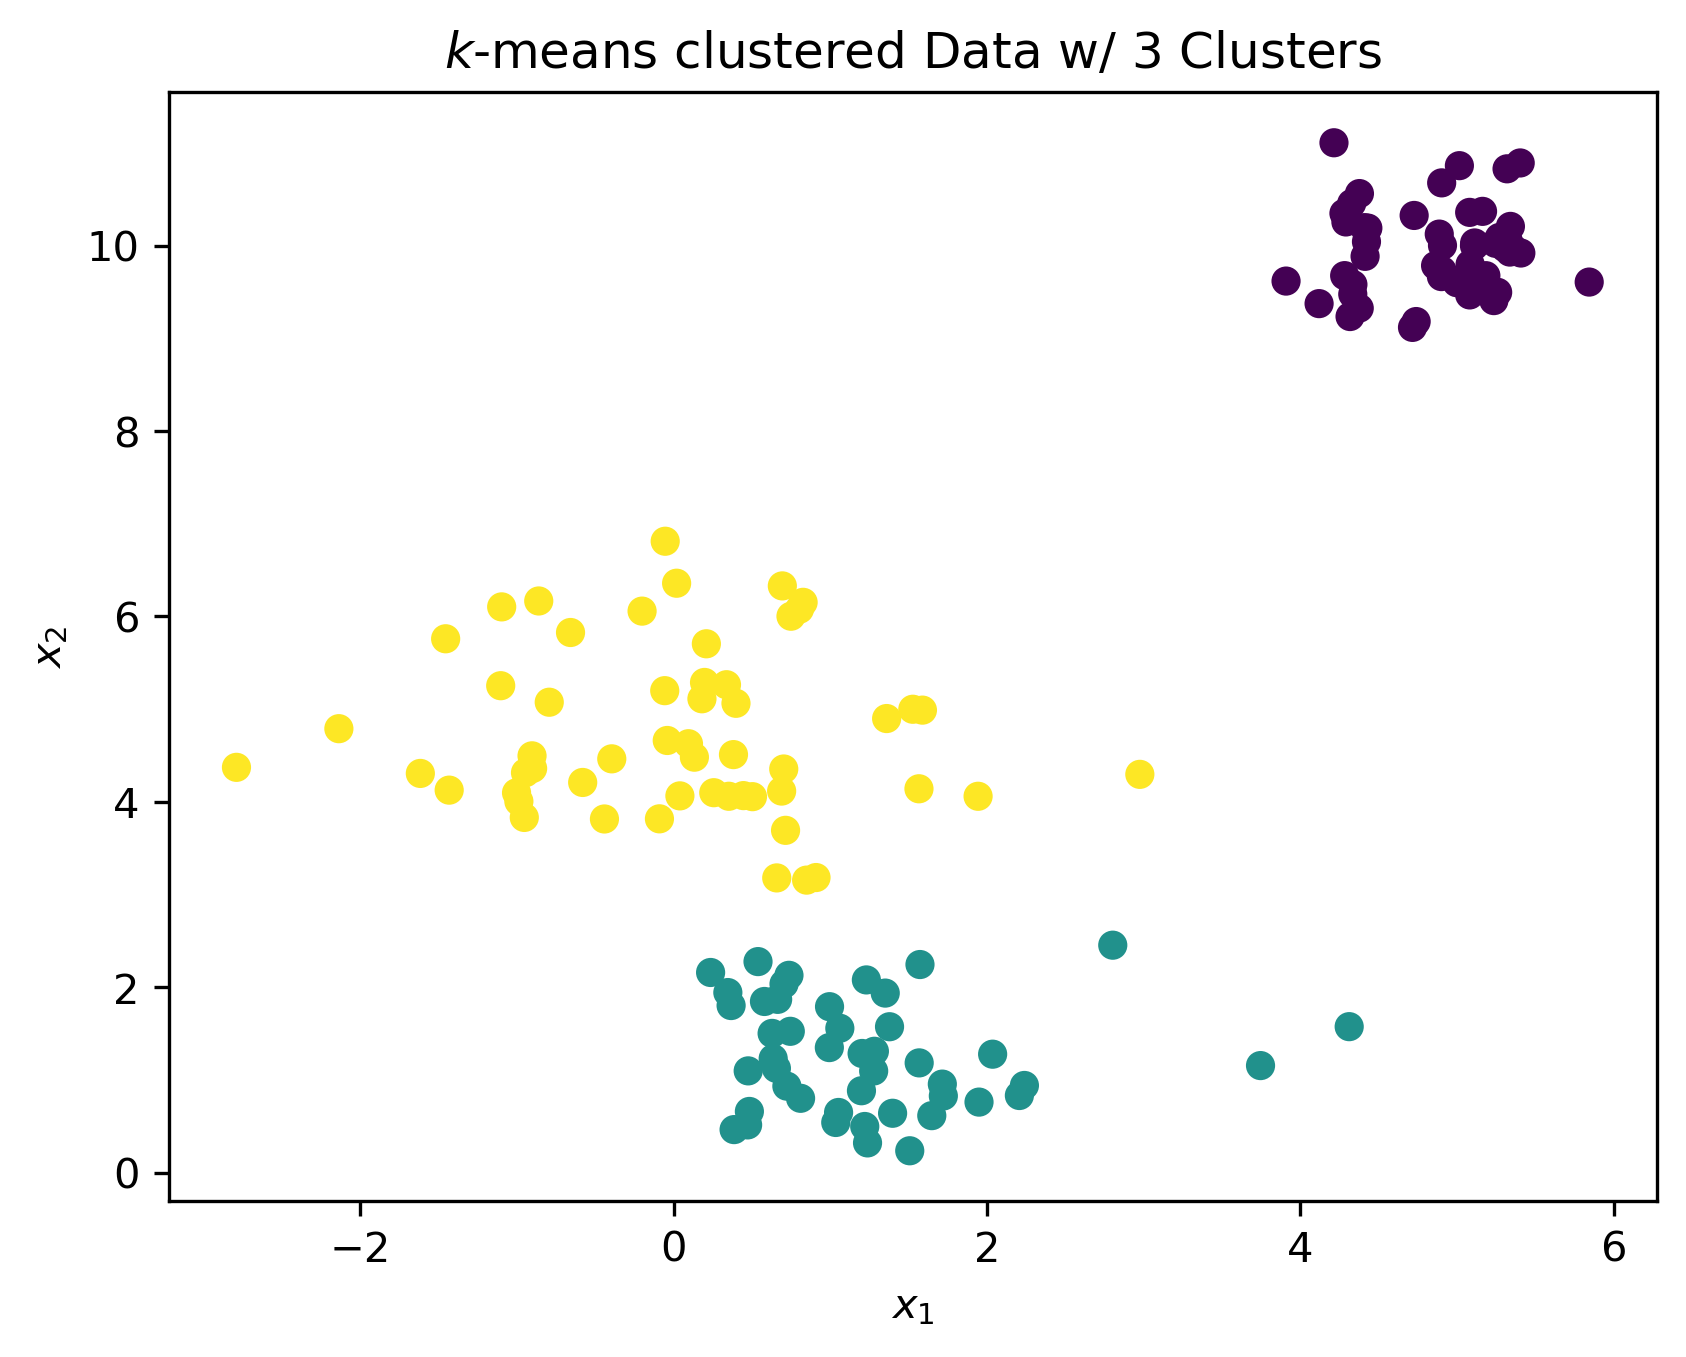

In [499]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init=100).fit(X)

fig, ax = plt.subplots(dpi=300)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set(title='$k$-means clustered Data w/ 3 Clusters', xlabel='$x_1$', ylabel='$x_2$');

for this highly idealized data we do an okay job at clustering with the simple and computationally inexpensive k-means!

# misc

There are some other helpful functions in scipy and numpy that are similar to matlab functions and very useful in 304 and life outside 304.

## numerical solving

some useful functions can be found in `scipy.optimize`. namely, `fsolve` (functionally equivalent to matlab's `fsolve`) and `least_squares` which is easier to understand how it works and able to bound solutions. 

### numerical solving example

from cheg304 spring 2025 homework 6:

> how many samples need taken for 95% confidence interval to be $\pm 1$, $s=9$

for this question, we need to iteratively solve this equation for $n$

$$
1 = t(0.025, n-1) \frac{s}{\sqrt{n}}
$$

In [485]:
from scipy.optimize import fsolve
from scipy.stats import t

alpha = 0.05
s = 9

def func(n):
    return 1 - t.ppf(1-alpha/2, n-1) * s / np.sqrt(n)

n = fsolve(func, 10)[0]
print(f'n: {n:.0f}')

n: 314


## visualization

nearly all python visualizations will use matplotlib in one way or another. the best resource i know is Nicholas Rougiers's python visualization book which is [free on github](https://github.com/rougier/scientific-visualization-book).

### rejection region visualization

from homework 6 question 1. this is a nice example because it uses pdf functions from scipy, sets up two axes in one figure, and uses `fill_between` to fill the rejection regions

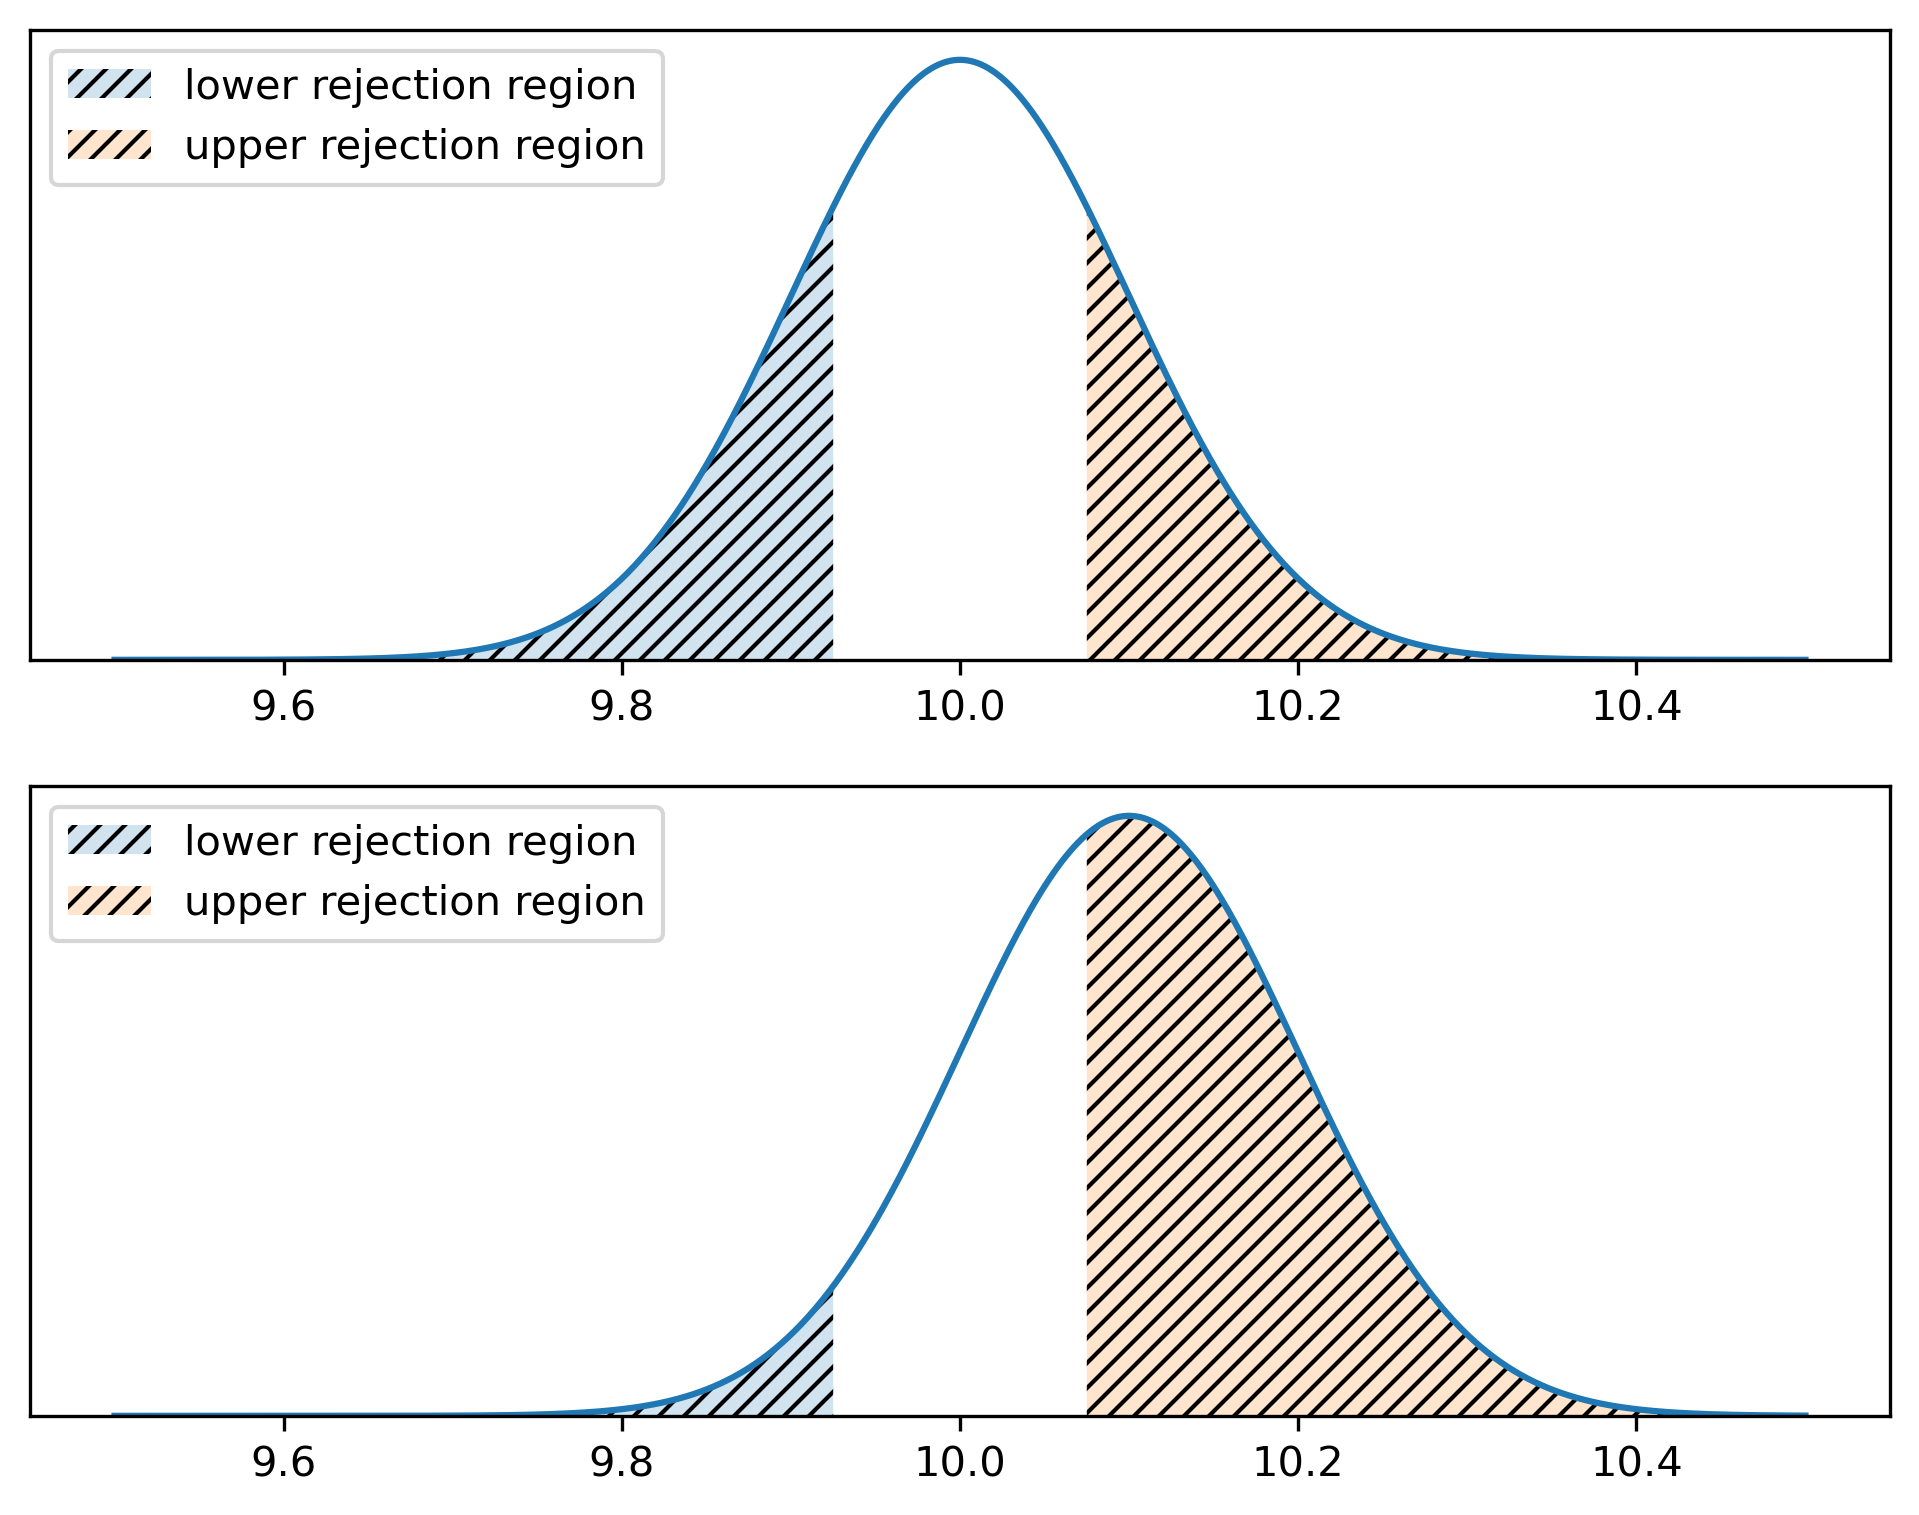

In [498]:
from scipy.stats import norm
import matplotlib.pyplot as plt

# set up a little helper function!
def plot_normal_with_rejection(ax, mean, std, n, reference_mean, hatch='////'):
    low, high = mean - 5*std, mean + 5*std
    x = np.linspace(low, high, 1000)
    y = norm.pdf(x, reference_mean, std)

    ax.plot(x, y, label='_nolegend_')

    crit = 3 * std / n
    for direction in [-1, 1]:
        x_fill = np.linspace(mean + direction * crit, high if direction > 0 else low, 1000)
        y_fill = norm.pdf(x_fill, reference_mean, std)
        ax.fill_between(x_fill, y_fill, alpha=0.2, hatch=hatch)

    ax.set(ylim=0)
    ax.set_yticks([])

mean, std, n = 10, 0.10, 4
actual_mean = 10.1

fig, (a, b) = plt.subplots(2, 1, dpi=300, figsize=(8, 6))

plot_normal_with_rejection(a, mean, std, n, mean)
plot_normal_with_rejection(b, mean, std, n, actual_mean)

a.legend(['lower rejection region', 'upper rejection region'], loc='upper left')
b.legend(['lower rejection region', 'upper rejection region'], loc='upper left');

# final thoughts

hopefully this can bring at least some minescule amount of value to someone wanting to use python functions for cheg304 coursework or related work. 